# Tarea 2

**Envío del PR inicial: 07.09.2018**

**Aceptación del PR: 14.09.2018**

In [1]:
using Plots

In [2]:
struct Dual
    x::Float64
    x′::Float64
end

In [3]:
Dual(c::Real) = Dual(c, 0.)
dual(x0::Real) = Dual(x0, 1.)

dual (generic function with 1 method)

In [4]:
import Base: +, -, *, /, ^

In [5]:
+(u::Dual, v::Dual) = Dual(u.x + v.x, u.x′ + v.x′)
-(u::Dual, v::Dual) = Dual(u.x - v.x, u.x′ - v.x′)
*(u::Dual, v::Dual) = Dual( u.x * v.x, u.x * v.x′ + u.x′ * v.x)

* (generic function with 220 methods)

In [6]:
function /(u::Dual, v::Dual)
    y = u.x / v.x
    Dual( y, (u.x′ - y * v.x′)/v.x )
end

/ (generic function with 90 methods)

In [7]:
function ^(u::Dual, n::Int)
    y = u.x^(n-1)
    Dual(u.x^n, n * y * u.x′)
end

^ (generic function with 57 methods)

## 1

Extiendan los operadores `+`, `-`, `*` y `/` para que funcionen cuando una de las dos entradas es un `Dual` y la otra es un `Real` (número cualquiera), sin importar el orden.

In [8]:
+(a::Real, u::Dual) = Dual(a + u.x, u.x′)
+(u::Dual, a::Real) = Dual(a + u.x, u.x′)

+ (generic function with 203 methods)

In [9]:
-(a::Real, u::Dual) = Dual(a - u.x, u.x′)
-(u::Dual, a::Real) = Dual(u.x - a, u.x′)

- (generic function with 225 methods)

In [10]:
*(a::Real, u::Dual) = Dual(a * u.x, u.x′ * a)
*(u::Dual, a::Real) = Dual(a * u.x, u.x′ * a)

* (generic function with 222 methods)

In [11]:
/(a::Real, u::Dual) = Dual(a / u.x, -((a / u.x)*u.x′) / u.x)
/(u::Dual, a::Real) = Dual(u.x / a, u.x′ / a)

/ (generic function with 92 methods)

## 2

Construyan 2 tests para cada una de las operaciones aritméticas definidas para los `Dual`es, incluyendo las que definieron en el ejercicio 1.

In [12]:
using Base.Test

### Suma

In [13]:
@test Dual(1234, 5678) + Dual(4444, -4444) == Dual(5678, 1234)

Test Passed

In [14]:
@test Dual(pi, pi^4) + Dual(pi^4, -pi) == Dual(pi^4 + pi, pi^4 - pi)

Test Passed

### Resta

In [15]:
@test Dual(1234, 5678) - Dual(-4444, 4444) == Dual(5678, 1234)

Test Passed

In [16]:
@test Dual(234, 789) - Dual(111, 111) == Dual(123, 678)

Test Passed

### Producto

In [17]:
f(x) = 2x + 8
f′(x) = 2
g(x) = 4x^2 + 8x + 1
g′(x) = 8x + 8

g′ (generic function with 1 method)

In [18]:
@test Dual(f(1), f′(1)) * Dual(g(1), g′(1)) == Dual(f(1)*g(1), f′(1)*g(1) + f(1)*g′(1))

Test Passed

In [19]:
@test Dual(f(-3), f′(-3)) * 2 == Dual(4, 4)

Test Passed

### Cociente

In [20]:
@test Dual(f(1), f′(1)) / Dual(g(1), g′(1)) == Dual(f(1)/g(1), (f′(1)*g(1) - f(1)*g′(1))/ g(1)^2)

Test Passed

In [21]:
@test Dual(f(1.5), f′(1.5)) / 5 == Dual( f(1.5)/5, ((f′(1.5)*5)/ 5^2))

Test Passed

## 3

Sobrecarguen la función `show` (que está en Base) para que cuando se impriman los duales aparezcan con la notación $\varepsilon$ que usamos al principio de este notebook, por ejemplo, el resultado de `Dual(1,2)` debe ser parecido a `1.0 + 2.0 ε`.

In [22]:
import Base:show

In [23]:
function show(io::IO, u::Dual)
    u.x′ > 0 ? print(u.x,"+",u.x′,"ε"): print(u.x, u.x′,"ε")
end

show (generic function with 319 methods)

In [24]:
dual(1.)

1.0+1.0ε

## 4

Obtengan la derivada de 
$$g(x) = \frac{3x^2-8x+5}{7x^3-1}$$
en $x_0=1$.

In [25]:
f(x) = 3*x^2 - 8*x + 5
g(x) = (7*x^3) - 1

g (generic function with 1 method)

In [26]:
function derivada_cociente_pol(p, q, x0)
    x = dual(x0)
    z = p(x) / q(x)
    z.x′
end

derivada_cociente_pol (generic function with 1 method)

In [27]:
print("La derivada del cociente evaluada en x0=1 es, ", derivada_cociente_pol(f, g, 1.))

La derivada del cociente evaluada en x0=1 es, -0.3333333333333333

In [28]:
# La derivada calculada a mano es lo siguiente
h′(x) = ((6*x - 8) * (7*x^3 - 1) - (3*x^2 - 8*x + 5) * (21*x^2 - 1)) / (7x^3 - 1)^2

h′ (generic function with 1 method)

In [29]:
@test derivada_cociente_pol(f, g, 1) == h′(1.)

Test Passed

Éxito!!!

## 5

- Recordando la regla de la cadena(!!!), extiendan el usar los `Dual` a las funciones `sqrt`, `exp`, `log`, `sin`, `cos`, `sinh` y `cosh`. 

- Muestren que las cosas dan los resultados que esperan usando pruebas como hicieron en el ejercicio 2.

- Calculen la derivada de $h(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$ en $x_0 = 2$. ¿Qué tan preciso es el resultado?(Pueden usar cualquier otra manera de obtener el resultado correcto, sólo tienen que ser claros en la explicación.)

- Dibujen, para $x_0 \in [1,5]$ la función $h'(x)$.

In [30]:
import Base: sqrt, exp, log, sin, cos, sinh, cosh

# Redefinimos más funciones
sin(u::Dual) = Dual(sin(u.x), u.x′ * cos(u.x))
cos(u::Dual) = Dual(cos(u.x), -u.x′ * sin(u.x))
exp(u::Dual) = Dual(exp(u.x), u.x′ * exp(u.x))
log(u::Dual) = Dual(log(u.x), u.x′ / u.x)
sinh(u::Dual) = Dual(sinh(u.x), u.x′ * cosh(u.x))
cosh(u::Dual) = Dual(cosh(u.x), u.x′ * sinh(u.x))

cosh (generic function with 13 methods)

In [31]:
h(x) = sin(x^3 - 2/x^6)
h′(x) = cos(x^3 - 2/x^6) * (3*x^2 + 12/x^7) # Su derivada calculada a mano

h′ (generic function with 1 method)

In [32]:
x0 = 2
x = dual(x0) # La variable x evaluada en x0

2.0+1.0ε

In [33]:
dual_der = h(x).x′
an_der = h′(2);

In [34]:
println("La derivada evaluada en x0=2 mediante duales es ", dual_der)
println("La derivada analíticamente es ", an_der)
println("Error: ", abs(dual_der - an_der))

La derivada evaluada en x0=2 mediante duales es -1.384934905523464
La derivada analíticamente es -1.384934905523464
Error: 0.0


In [35]:
x_range = 1:0.01:5
h_primes = []
for x0 in x_range
    push!(h_primes, h(dual(x0)).x′)
end

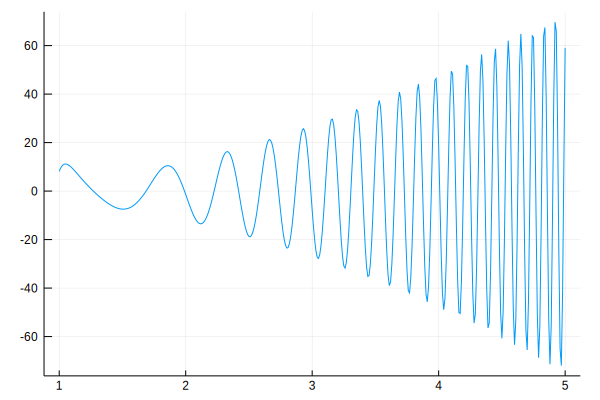

In [36]:
plot(x_range, h_primes, label="")

## 6

Implementen el método de Newton para una función arbitraria $f(x)$ en una variable, explotando el uso de los `Dual`. 

- Obtengan, usando su función para el método de Newton, las raices del polinomio de Wilkinson 

$$
W_{6}(x) = (x-1)(x-2)(x-3)(x-4)(x-5)(x-6),
$$ 

usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

In [37]:
doc"""
    newton_dual(f, x0, n_iter)
Devuelve las raíces de la función `f` mediante el uso de números del tipo `Dual`.

"""
function newton_dual(f, x0, n_iter::Int64=1000)
    
    x_nn = x_n = x0
    
    for i in 1:n_iter
        a = dual(x_n)
        z = f(a)
        x_nn = x_n - (z.x / z.x′)
        x_n = x_nn
    end
    return float(x_nn)
end

newton_dual

### Polinomio de Wilkinson

In [38]:
W_6(x) = (x-1)*(x-2)*(x-3)*(x-4)*(x-5)*(x-6)

W_6 (generic function with 1 method)

In [39]:
xx_0 = [2.2, 2.45]
for x0 in xx_0
    println("Para $x0, el método converge a ", newton_dual(W_6, x0))
end

Para 2.2, el método converge a 2.0
Para 2.45, el método converge a 6.0


In [40]:
# Calculamos todas las raíces
rango_x0 = -100:100

raices = []

for x0 in rango_x0
    raiz = newton_dual(W_6, x0)
    push!(raices, raiz)
end

In [41]:
unique(raices)

6-element Array{Float64,1}:
 1.0
 2.0
 3.0
 4.0
 5.0
 6.0

### Función $g(x)=xsin(2x)$

In [42]:
g(x) = x*sin(2x)

x0 = 0.7
println("Para x0=0.7, el método converge a ", newton_dual(g, x0))

Para x0=0.7, el método converge a 4.878902768179326e-163


## 7

Argumenten qué podrían hacer para extender la idea de los `Dual` y calcular derivadas aún más altas. Como caso concreto, piensen en querer obtener la derivada 18 de funciones como las que hemos usado arriba

Como bien sabemos la expansión en serie de Taylor alrededor de $(x+h)$ de una función $f$ está dada por

$$
f(x+h)=\sum_{k=0}^\infty\dfrac{d^kf(x)}{dx^k}\dfrac{h^k}{k!}
$$

Ahora, si tomamos $(x+h)$ como $(x+x'\varepsilon$) y sustitumos en la expansión de Taylor, se obtiene

$$
f(x+x'\varepsilon)=f(x) + \dfrac{1}{1!}\dfrac{df(x)}{dx}(x'\varepsilon)+\cdots+\dfrac{1}{k!}\dfrac{d^kf(x)}{dx^k}(x'\varepsilon)^k
$$
Notemos que si $\varepsilon^2=0$, esta es la condición aquí propuesta, entonces la expansión se vuelve
$$
f(x+x'\varepsilon)=f(x) + \dfrac{df(x)}{dx}x'\varepsilon
$$
es decir, bajo esta condición se recuperan las propiedades vistas anteriormente.
Lo anterior sugiere una manera de definir duales para derivadas de orden superior, si se quiere la derivada n-ésima, entonces hay que pedir que $\varepsilon^{n+1}=0$ y definir al dual $z$ como
$$
z = x+\sum_{i=1}^nx^{(i)}\varepsilon_i
$$
Posteriormente a esto se redefinen las operaciones elementales tal como se hizo aquí(estas son +, -, \*, /, ^), aquí es útil recordar la regla de la derivada de un producto de Leibniz

$$
\dfrac{d^n}{dx^n}(fg) = \sum_{k=0}^n\binom{n}{k}\dfrac{d^{(n-k)}f}{dx^{(n-k)}}\dfrac{d^kg}{dx^k}
$$

Listo!